<h1>Chapter 4 | Data Exercise #2 | <code>wms-management-survey</code> | Comparison and correlation</h1>
<h2>Introduction:</h2>
<p>In this notebook, you will find my notes and code for Chapter 5's <b>exercise 2</b> of the book <a href="https://gabors-data-analysis.com/">Data Analysis for Business, Economics, and Policy</a>, by Gábor Békés and Gábor Kézdi. The question was: 
<p>2. Using the <code>wms-management-survey</code> dataset:</p>
<p>Assignments:</p>
<ul>
    <li>Pick a country different from Mexico.</li>
    <li>Reproduce all figures and tables of our case study.</li>
    <li>Compare your results to what we found for Mexico.</li>
</ul>
<h2><b>1.</b> Load the data</h2>

In [1]:
import os
import sys
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *
from mizani.formatters import percent_format

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Increase number of returned rows in pandas
pd.set_option("display.max_rows", 500)

In [3]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_data_exercises")[0]

# Get location folders
data_in = f"{dirname}da_data_repo/wms-management-survey/clean/"
data_out = f"{dirname}da_data_exercises/ch04-comparison_correlation/02-wms_management_ex1/data/clean/"
output = f"{dirname}da_data_exercises/ch04-comparison_correlation/02-wms_management_ex1/"
func = f"{dirname}da_case_studies/ch00-tech_prep/"
sys.path.append(func)

In [4]:
from py_helper_functions import *

In [5]:
df = pd.read_csv(f"{data_in}wms_da_textbook.csv")

In [6]:
df["country"].unique()

array(['United States', 'India', 'New Zealand', 'Australia', 'Argentina',
       'Brazil', 'Canada', 'Chile', 'China', 'Germany', 'Spain', 'France',
       'Northern Ireland', 'Great Britain', 'Greece',
       'Republic of Ireland', 'Italy', 'Japan', 'Mexico', 'Poland',
       'Portugal', 'Sweden', 'Singapore', 'Turkey'], dtype=object)

In [7]:
df.head()

,firmid,wave,cty,country,sic,management,operations,monitor,target,people,...,aa_196,aa_197,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205
0,1,2004,us,United States,38.0,3.500000,3.0,3.6,3.6,3.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2006,us,United States,38.0,3.166667,5.0,3.8,2.6,2.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2010,us,United States,38.0,3.000000,2.0,2.8,3.6,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,2004,us,United States,28.0,4.666667,4.5,4.8,4.4,4.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2004,us,United States,28.0,4.444445,4.5,4.6,4.4,4.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3>1.1 Sample selection</h3>
<p>Let's pick a country with different proportions than Mexico yet let's apply the same exclusions made by the author, that is, filtering out firms with fewer than 100 employees and more than 5000 employees. We'll use the same year, 2013 - we'll choose <b>Brazil</b>.</p>

In [8]:
df = df.loc[
    lambda x: (x["country"] == "Brazil") &
              (x["wave"] == 2013) &
              (x["emp_firm"] >= 100) &
              (x["emp_firm"] <= 5000)
]

In [9]:
df["emp_firm"].describe()

count     506.000000
mean      682.561265
std       936.190571
min       100.000000
25%       181.000000
50%       343.500000
75%       717.250000
max      5000.000000
Name: emp_firm, dtype: float64

<h2>2. Visualizing the distribution of management score</h2>

In [10]:
df.loc[:, ["management"]].describe()

,management
count,506.000000
mean,2.734848
std,0.588271
min,1.055556
25%,2.333333
50%,2.777778
75%,3.111111
max,4.500000


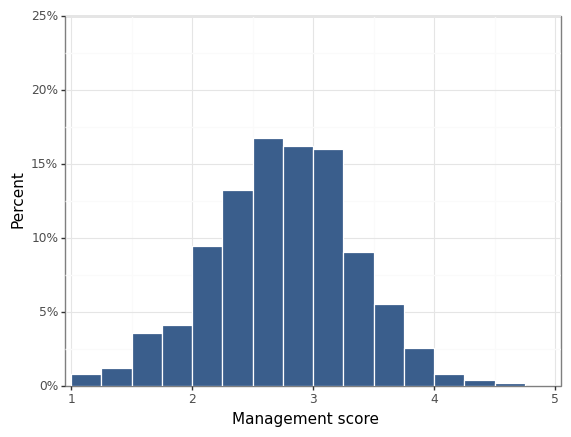

<ggplot: (190631316060)>

In [11]:
ggplot(df, aes(x="management")) + geom_histogram(
    aes(y="stat(count)/sum(stat(count))"),
    fill=color[0],
    color="white",
    binwidth=0.25,
    boundary=0,
    closed="left",
) + labs(x="Management score", y="Percent") + scale_x_continuous(
    expand=(0.01, 0.01), limits=(1, 5)
) + scale_y_continuous(
    expand=(0.00, 0.00),
    limits=(0, 0.25),
    breaks=seq(0, 0.26, by=0.05),
    labels=percent_format()
) + theme_bw()

Some observations about the histogram:
<ul>
<li>The mean is <b>2.73</b>, while the median is <b>2.77</b>. The dataset resembles a normal distribution, with a small degree of skewness to the left.</li>
<li>The standard deviation is <b>0.58</b>.</li>
<li>The mode is in the bin between <b>2.5</b> and <b>2.75</b>.
</ul>
<h2>3. Visualizing the distribution of employment</h2>
<p>We can start by looking at the summary statistics of Brazilian firms by their respective size, which is measured by the number of employees employed by each firm.</li>

In [12]:
df.loc[:, ["emp_firm"]].describe()

,emp_firm
count,506.000000
mean,682.561265
std,936.190571
min,100.000000
25%,181.000000
50%,343.500000
75%,717.250000
max,5000.000000


<p>Observations:</p>
<ul>
<li>The mean is <b>682</b> and the median, <b>343</b>.</li>
<li>The mean is far higher than the median and therefore we can expect a significant degree of <b>skewness</b> to the right.</li>
<li>The standard deviation is <b>936</b>.
</ul>

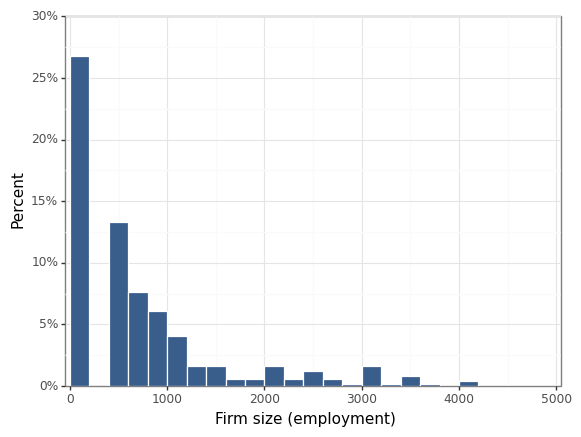

<ggplot: (190631315811)>

In [13]:
ggplot(df, aes(x="emp_firm", y="stat(count)/sum(stat(count))")) + geom_histogram(
    fill=color[0], color="white", binwidth=200, boundary=0, closed="left"
) + labs(x="Firm size (employment)", y="Percent") + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 5000), breaks=seq(0, 5001, by=1000)
) + scale_y_continuous(
    expand=(0.00, 0.00),
    limits=(0, 0.3),
    breaks=seq(0, 0.5, by=0.05),
    labels=percent_format(),
) + theme_bw()

The histogram shows a high concentration of smaller firms in Brazil. More specifically, more than 25% of all observations registered firms with less than 200 employees. Interestingly enough, there were no observations in the 200-400 bin.

To make this distribution more symmetric, we can plot a histogram formatted by the lognormal distribution.

In [14]:
df["lnemp_firm"] = np.log(df["emp_firm"])
df["lnemp_firm"].describe()

count    506.000000
mean       5.974693
std        0.965696
min        4.605170
25%        5.198452
50%        5.839186
75%        6.575327
max        8.517193
Name: lnemp_firm, dtype: float64

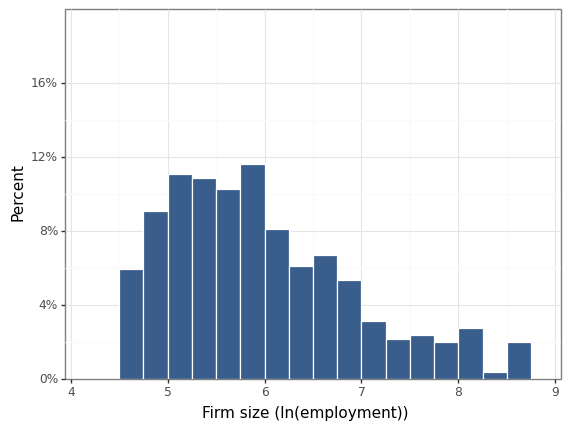

<ggplot: (190633586977)>

In [15]:
ggplot(df, aes(x="lnemp_firm"))  + geom_histogram(
    aes(y="stat(count)/sum(stat(count))"),
    fill=color[0], 
    color="white", 
    binwidth=0.25, 
    boundary=0, 
    closed="left"
) + labs(x="Firm size (ln(employment))", y="Percent") + scale_x_continuous(
    expand=(0.01, 0.01), limits=(4, 9) 
) + scale_y_continuous(
    expand=(0.00, 0.00),
    limits=(0, 0.2),
    breaks=seq(0, 0.2, by=0.04),
    labels=percent_format(),
) + theme_bw()

<p>We notice that the distribution is not as skewed as before, yet it still presents a longer tail to the right. The distribution, nonetheless, is much more symmetrical. In conclusion, the distribution of employment is skewed; while closer to lognormal than normal, the latter is still not the best approach.</p>
<h2>4. Conditional probabilities | Binning firm size and visualize the quality of specific management practices accordingly</h2>
<p>As a reminder, <b>conditional probability</b> of an event means the probability of an event if another event (the conditioning event) happens. Because both the management score and employment are quantitative variables with many values, they are not adequate for an investigation conditional probabilities.</p>
<p>To overcome this issue, we will create a <b>qualitative</b> variable by creating three bins of employment: <b>small, medium, and large</b>. Let's follow the book's example and bind the bins by three intervals: 100-199, 200-999, and 1000+.


In [16]:
df["emp3bins"] = np.where(df["emp_firm"] < 200, 1, np.nan)
df["emp3bins"] = np.where((df["emp_firm"] >= 200) & (df["emp_firm"] < 1000), 2, df["emp3bins"])
df["emp3bins"] = np.where(df["emp_firm"] >= 1000, 3, df["emp3bins"])

In [17]:
df.head()

,firmid,wave,cty,country,sic,management,operations,monitor,target,people,...,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205,lnemp_firm,emp3bins
1760,1290,2013,br,Brazil,28.0,3.277778,3.0,3.8,3.0,3.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.877296,2.0
1763,1292,2013,br,Brazil,33.0,2.555556,2.5,3.2,2.8,1.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.620073,2.0
1765,1293,2013,br,Brazil,33.0,2.666667,3.0,2.8,2.6,2.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.040255,2.0
1766,1294,2013,br,Brazil,35.0,3.222222,4.0,3.8,2.8,2.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.313220,3.0
1770,1297,2013,br,Brazil,31.0,3.222222,3.0,3.4,3.0,3.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.605170,1.0


In [18]:
df["emp3bins"].describe()

count    506.000000
mean       1.913043
std        0.657288
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: emp3bins, dtype: float64

<p>By now, we can make a few comparisons with the book case study, which used Mexico as an example. We can tell that Brazil and Mexico display similar statistics regarding firm sizes.</p>
<ul>
<li>The mean for Brazil, <b>1.91</b> is close to that of Mexico, <b>2</b>. We can expect that the average firm in both countries is medium-sized.</li>
<li>The standard deviation is equally similar: <b>0.65</b> for Brazil, <b>0.63</b> for Mexico.</li>
</ul>
<h3>4.1 Plotting stacked charts - Describing patterns of association</h3>
<p>We will use stacked charts to visualize conditional probabilities. Because we have 15 conditional probabilities for each management score (that is, the probability of each of the 5 values of y by each of the three values of x), a stacked bar chart will be of great assistance. Let's create the DataFrames for our job.</p>
<h4>4.1.1 Stacked bar chart | Figure 4.3 (a) Lean management</h4>

In [19]:
df1 = pd.DataFrame(
    df.loc[:, ["emp3bins", "lean1"]].groupby(["emp3bins", "lean1"]).agg("size")
).reset_index()

df1.columns = ["emp3bins", "lean1", "Count"]

group_counts = df1.groupby("emp3bins").agg("sum")["Count"]

df1.loc[df1["emp3bins"] == 1, "Percent"] = round(df1.loc[df1["emp3bins"] == 1, "Count"]/group_counts[1],5)
df1.loc[df1["emp3bins"] == 2, "Percent"] = round(df1.loc[df1["emp3bins"] == 2, "Count"]/group_counts[2],5)
df1.loc[df1["emp3bins"] == 3, "Percent"] = round(df1.loc[df1["emp3bins"] == 3, "Count"]/group_counts[3],5)

df1 = df1.assign(
    lean1=pd.Categorical(
        df1["lean1"], categories=sorted(set(df["lean1"]), reverse=True)
    )
)

In [20]:
df1

,emp3bins,lean1,Count,Percent
0,1.0,1.0,27,0.20301
1,1.0,2.0,59,0.44361
2,1.0,3.0,37,0.27820
3,1.0,4.0,9,0.06767
4,1.0,5.0,1,0.00752
5,2.0,1.0,29,0.10211
6,2.0,2.0,108,0.38028
7,2.0,3.0,103,0.36268
8,2.0,4.0,34,0.11972
9,2.0,5.0,10,0.03521


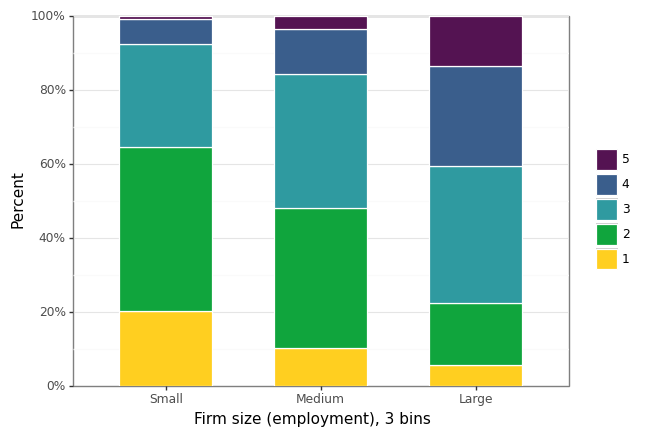

<ggplot: (190633629249)>

In [21]:
ggplot(df1, aes(x="emp3bins", y="Percent", fill="lean1")) + geom_bar(
    stat="identity", position="fill", width=0.6, color="white", size=0.5, alpha=0.8
) + scale_y_continuous( 
    expand=(0, 0), limits=(0, 1), breaks=seq(0, 1.1, by=0.2), labels=percent_format()
) + labs(
    x="Firm size (employment), 3 bins", y="Percent"
) + theme_bw() + theme(
    legend_position="right"
) + scale_fill_manual(
    values=(color[2], color[0], color[4], color[1], color[3]), name=" "
) + scale_x_discrete(limits=[1, 2, 3],
                     labels=["Small", "Medium", "Large"])

In [22]:
df1

,emp3bins,lean1,Count,Percent
0,1.0,1.0,27,0.20301
1,1.0,2.0,59,0.44361
2,1.0,3.0,37,0.27820
3,1.0,4.0,9,0.06767
4,1.0,5.0,1,0.00752
5,2.0,1.0,29,0.10211
6,2.0,2.0,108,0.38028
7,2.0,3.0,103,0.36268
8,2.0,4.0,34,0.11972
9,2.0,5.0,10,0.03521


What can we observe from this chart? Well, overall, there is a positive correlation between lean management and firm size. As firm size gets bigger, we tend to see an increase in higher ratings and a decrease in lower values. Brazil has returned lean management results similar to Mexico. The correlation is similar in both cases, with a few difference. For instance, small firms in Brazil received lower ratings than in Mexico, with more than 60% of values equal or lower than 2 - in Mexico, this range registered a percentage of around 58%. Medium-sized firms, likewise, showed a large proportion of a score of 3 points, while Mexican firms with such firm size presented a higher proportion of 4 to 5 points. Brazilian large firms, however, were graded in a different way when compared to its Mexican counterparts. The proportion of firms rated with 1 to 2 points was around 21%, while in Mexico this range was around 32%. There was also a significant difference in 3 and 5 points ratings: Brazilian firms registered 37% of firms rated with 3 points, compared to 30% in Mexico, and 13% with 5 points, compared to 8% in Mexico. Considering that both countries registered similar proportions for 4 points, hence, we can affirm that Brazilian large-sized firms scored higher points than Mexican firms with similar sizes.

Let's plot the second stacked chart.
<h4>4.1.2 Stacked bar chart | Figure 4.3 (b) Performance tracking</h4>


In [23]:
df2 = pd.DataFrame(
    df.loc[:, ["emp3bins", "perf2"]].groupby(["emp3bins", "perf2"]).agg("size")
).reset_index()

df2.columns = ["emp3bins", "perf2", "Count"]

group_counts = df2.groupby("emp3bins").agg("sum")["Count"]

df2.loc[df2["emp3bins"] == 1, "Percent"] = round(df2.loc[df2["emp3bins"] == 1, "Count"]/group_counts[1],5)
df2.loc[df2["emp3bins"] == 2, "Percent"] = round(df2.loc[df2["emp3bins"] == 2, "Count"]/group_counts[2],5)
df2.loc[df2["emp3bins"] == 3, "Percent"] = round(df2.loc[df2["emp3bins"] == 3, "Count"]/group_counts[3],5)

df2 = df2.assign(
    perf2=pd.Categorical(
        df2["perf2"], categories=sorted(set(df["perf2"]), reverse=True)
    )
)

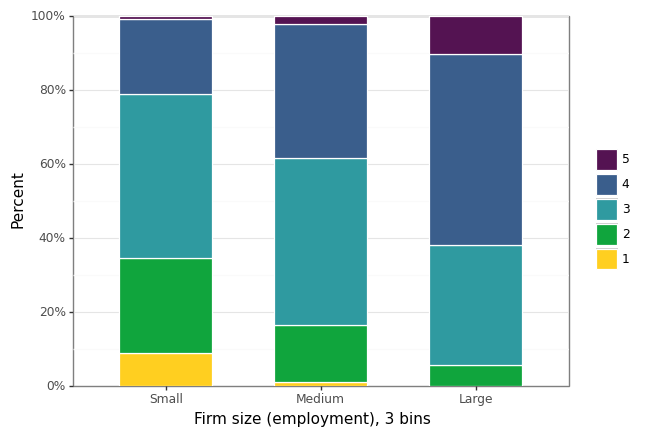

<ggplot: (190633671482)>

In [24]:
ggplot(df2, aes(x="emp3bins", y="Percent", fill="perf2")) + geom_bar(
    stat="identity", position="fill", width=0.6, color="white", size=0.5, alpha=0.8
) + scale_y_continuous( 
    expand=(0, 0), limits=(0, 1), breaks=seq(0, 1.1, by=0.2), labels=percent_format()
) + labs(
    x="Firm size (employment), 3 bins", y="Percent"
) + theme_bw() + theme(
    legend_position="right"
) + scale_fill_manual(
    values=(color[2], color[0], color[4], color[1], color[3]), name=" "
) + scale_x_discrete(limits=[1, 2, 3],
                     labels=["Small", "Medium", "Large"])

In [25]:
df2

,emp3bins,perf2,Count,Percent
0,1.0,1.0,12,0.09023
1,1.0,2.0,34,0.25564
2,1.0,3.0,59,0.44361
3,1.0,4.0,27,0.20301
4,1.0,5.0,1,0.00752
5,2.0,1.0,3,0.01056
6,2.0,2.0,44,0.15493
7,2.0,3.0,128,0.45070
8,2.0,4.0,103,0.36268
9,2.0,5.0,6,0.02113


Here again, the figures show a similar pattern association between the quality of management and firm size. Small firms in Brazil tend to have lower scores and a lower probability of displaying high scores than medium-sized firms, which are more likely to have low scores and less likely to have higher scores than large firms. 

Now, when comparing Brazilian and Mexican firms, we notice than small-sized firms from Brazil performed worse than similar Mexican companies. The former registered a higher number of poorly-rated scores - almost 35% of all observations for small firms were equal to or below 2. In Mexico, this range did not exceed 22%. Only around 21% of small-sized Brazilain firms registered 4 to 5 points in performance tracking, while more than 40% of Mexican firms of a similar size got 4 or more points. This difference is evident in other firm size categories. Large Mexican firms, for instance, registered a higher proportion of 4 to 5 points than Brazilian firms. Overall, however, the correlation seems clear - the larger the company, the better managed it seems to be.

<h3>4.2 Ploting bin scatters</h3>
<h4>4.2.1 Three bins</h4>
<p>We can now discuss conditional mean and joint distribution. Remember that <b>joint distribution</b> of two variables is the frequency of each value combination of the two variables. First, let's use the three bins that we had created. We can group them by the 3 bins and the firm sizes. We can get aggregate measures of min, max, average, median, standard deviation, and frequency of each bin category. Then, we will replace the bin numbers by a point corresponding to the midpoint in the employment bin (for instance, 150 for the 100-199 bin, 600 for the 200-999 bin, and so on).</p>

In [26]:
df.filter(["emp_firm", "emp3bins"]).groupby("emp3bins").agg(
    ["min", "max", "mean", "median", np.std, "size"]
)

emp_firm                                               
              min     max         mean  median          std size
emp3bins                                                        
1.0         100.0   195.0   140.157895   140.0    26.936188  133
2.0         200.0   984.0   431.144366   355.0   208.969431  284
3.0        1000.0  5000.0  2295.393258  2000.0  1268.342741   89

In [27]:
# Recode employee bins 
df["emp3bins"] = df["emp3bins"].replace(1, 150).replace(2, 600).replace(3, 3000)
df["emp3bins"]

1760     600.0
1763     600.0
1765     600.0
1766    3000.0
1770     150.0
         ...  
2898     150.0
2899    3000.0
2904     150.0
2905     600.0
2907    3000.0
Name: emp3bins, Length: 506, dtype: float64

In [28]:
# Summary statistics
df.filter(["emp_firm", "emp3bins"]).groupby("emp3bins").agg(
    ["min", "max", "mean", "median", np.std, "size"]
)

emp_firm                                               
              min     max         mean  median          std size
emp3bins                                                        
150.0       100.0   195.0   140.157895   140.0    26.936188  133
600.0       200.0   984.0   431.144366   355.0   208.969431  284
3000.0     1000.0  5000.0  2295.393258  2000.0  1268.342741   89

<p>We can now get the mean management scores for each bin by aggregating the data using the 3 bins and visualize the result.</p>

In [29]:
# Generate variables by mean
df1 = df.groupby("emp3bins").agg(management_emp3bins=("management", "mean")).reset_index()
df1

,emp3bins,management_emp3bins
0,150.0,2.412281
1,600.0,2.755086
2,3000.0,3.152310


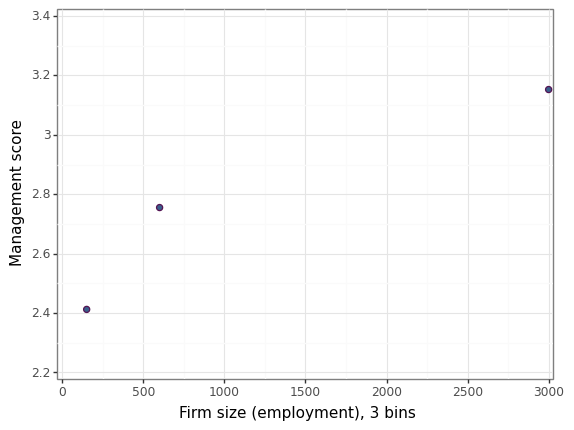

<ggplot: (190633547813)>

In [30]:
ggplot(df1, aes(x="emp3bins", y="management_emp3bins")) + geom_point(
    size=2, color=color[2], fill=color[0], alpha=0.8, na_rm=True
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(2.2, 3.4), breaks=seq(2.2, 3.5, by=0.2)
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 3000), breaks=seq(0, 3001, by=500)
) + labs(
    x="Firm size (employment), 3 bins", y="Management score"
) + theme_bw()

<p>As we can observe, there is a clear <b>positive</b> association. Larger firms, on average, are better managed. We got a mean score of 2.41 for small firms, 2.75 for medium-sized firms, and 3.14 for large firms. As expected, these mean values are lower than in Mexican firms for all three bins (2.67, 2.94, and 3.18, respectively). Yet, the overall correlation is very similar.</p>

<p>Now, would this association hold when using a bin scatter of 10 bins? Let's find out.</p>
<h4>4.2.2 Ten-bin scatter</h4>

In [31]:
df["emp10bins"] = pd.qcut(df["emp_firm"],10)

<p>We just applied an interesting function, <code>qcut()</code>, that discretizes variables into equal-sized buckets. I had no idea that such a function existed, so helpful!</p>

In [32]:
# Summary
df_summary = df.filter(["emp_firm", "emp10bins"]).groupby("emp10bins").agg(
    ["min", "max", "mean", "median", np.std, "size"]
)
df_summary

emp_firm                                               
                      min     max         mean  median          std size
emp10bins                                                               
(99.999, 130.0]     100.0   130.0   112.814815   110.0    11.201540   54
(130.0, 163.0]      132.0   163.0   147.270833   150.0     8.327702   48
(163.0, 200.0]      165.0   200.0   186.666667   185.0    12.754577   54
(200.0, 260.0]      202.0   260.0   235.301887   230.0    18.969191   53
(260.0, 343.5]      262.0   343.0   302.545455   300.0    20.824242   44
(343.5, 420.0]      344.0   420.0   376.411765   370.0    26.832947   51
(420.0, 600.0]      423.0   600.0   510.728814   500.0    62.025810   59
(600.0, 880.0]      615.0   880.0   749.952381   750.0    70.299690   42
(880.0, 1675.0]     890.0  1650.0  1139.080000  1085.0   213.216077   50
(1675.0, 5000.0]   1700.0  5000.0  3109.215686  3000.0  1103.544912   51

<p>We can now get the midpoint of each bin by replacing the interval with the mean of each interval.</p>

In [33]:
# Recode
df = df.replace({"emp10bins": df_summary["emp_firm"]["mean"].to_dict()})

In [34]:
df.filter(["emp_firm", "emp10bins"]).groupby("emp10bins").agg(
    ["min", "max", "mean", "median", np.std, "size"]
)

emp_firm                                               
                        min     max         mean  median          std size
emp10bins                                                                 
112.81481481481481    100.0   130.0   112.814815   110.0    11.201540   54
147.27083333333334    132.0   163.0   147.270833   150.0     8.327702   48
186.66666666666666    165.0   200.0   186.666667   185.0    12.754577   54
235.30188679245282    202.0   260.0   235.301887   230.0    18.969191   53
302.54545454545456    262.0   343.0   302.545455   300.0    20.824242   44
376.4117647058824     344.0   420.0   376.411765   370.0    26.832947   51
510.728813559322      423.0   600.0   510.728814   500.0    62.025810   59
749.952380952381      615.0   880.0   749.952381   750.0    70.299690   42
1139.08               890.0  1650.0  1139.080000  1085.0   213.216077   50
3109.2156862745096   1700.0  5000.0  3109.215686  3000.0  1103.544912   51

In [35]:
# Return variables by mean
df1 = df.groupby("emp10bins").agg(management_emp10bins=("management", "mean")).reset_index()
df1

,emp10bins,management_emp10bins
0,112.814815,2.365226
1,147.270833,2.393519
2,186.666667,2.575103
3,235.301887,2.631027
4,302.545455,2.584596
5,376.411765,2.732026
6,510.728814,2.905838
7,749.952381,2.837302
8,1139.080000,3.073333
9,3109.215686,3.242919


In [36]:
df1 = df1[["emp10bins", "management_emp10bins"]].astype("float64")

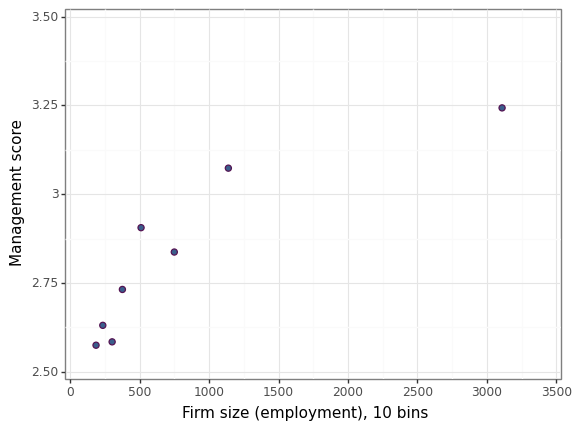

<ggplot: (190633939716)>

In [37]:
ggplot(df1, aes(x="emp10bins", y="management_emp10bins")) + geom_point(
    size=2, color=color[2], fill=color[0], alpha=0.8, na_rm=True
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(2.5, 3.5), breaks=seq(2.5, 3.6, by=0.25)
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 3500), breaks=seq(0, 3501, by=500)
) + labs(
    x="Firm size (employment), 10 bins", y="Management score"
) + theme_bw()

The bin scatter, binned in 10 bins, returned a somewhat **linear relationship**, as the average management score tended to increase as the firm size increased. Large firms, however, did not registered an increase in the same magnitude, yet, overall, the positive correlation between firm size and management score is clearly visible. We can also notice the high degree of **skewness** in both bin scatters, which reflects the distribution of our dataset.
What about Brazilian firms vs Mexican firms? Well, Brazilian firms displayed a more positive correlation when compared to their Mexican counterparts. While the average value for each bin did not change significantly for Mexican firms with between around 300 and 1000 employees, Brazilian firms displayed a clearly positive correlation. And that is also related to the fact that smaller Mexican firms achieved higher scores than Brazilian ones. Perhaps in Brazil, firm size and management score are more positively correlated.

We can now plot a **scatterplot** of all observations to see if all large firms really displayed better management scores considering their conditional mean values.

<h3>4.3 Scatterplot</h3>

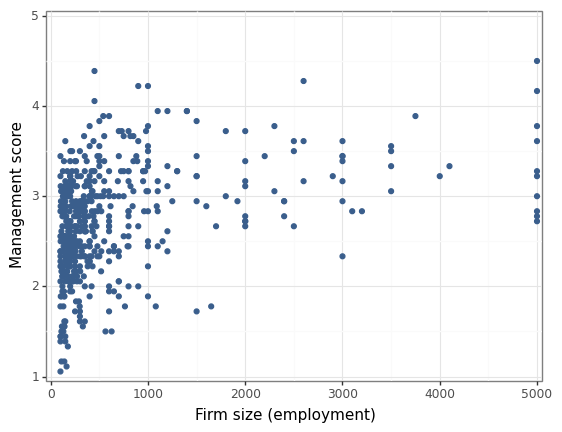

<ggplot: (190633992778)>

In [38]:
ggplot(df, aes(x="emp_firm", y="management")) + geom_point(
    size=1.5, color=color[0], alpha=0.8, na_rm=True
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(1, 5), breaks=seq(1, 6, 1)
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(0, 5000), breaks=seq(0, 5001, by=1000)
) + labs(
    x="Firm size (employment)", y="Management score"
) + theme_bw()

<p>Because the distribution of our data is highly skewed, we cannot see a clear pattern. We can apply the natural log of the employment on the x axis, which translates into a stretched difference between firms at lower levels of employment. Let's observe the results below:</p>

In [39]:
df["lnemp"] = np.log(df["emp_firm"])

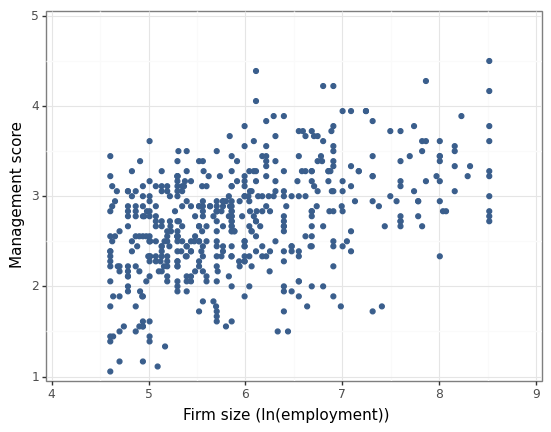

<ggplot: (190633788314)>

In [40]:
ggplot(df, aes(x="lnemp", y="management")) + geom_point(
    size=1.5, color=color[0], alpha=0.8, na_rm=True
) + scale_y_continuous(
    expand=(0.01, 0.01), limits=(1, 5), breaks=seq(1, 6, 1)
) + scale_x_continuous(
    expand=(0.01, 0.01), limits=(4, 9), breaks=seq(4, 10, by=1)
) + labs(
    x="Firm size (ln(employment))", y="Management score"
) + theme_bw()

<p>With our observations spread out, we can observe a positive correlation between management score and firm size. However, we also see a lot of variation of the management score at every level of employment - there is a lot of spread of the management score among firms with the same size.</p>
<p>Brazilian and Mexican firms displayed a similar degree of spread of the data. Across all firm sizes, we can see a lot of variation despite the visible positive correlation between the dependent and the explanatory variable.</p>
<p>To get more insight into whether - and to what extent - the spread or skewness of the managmeent score distribution differ at different levels of employments, we can produce <b>box plots</b> and <b>violin plots</b> of the management score for three employment bins.</p>
<h3>4.4 Box plots and violin plots to visualize the spread of the data</h3>

In [41]:
df = df.replace({"emp3bins":{
                    150: "Small",
                    600: "Medium",
                    3000: "Large",}
                    })

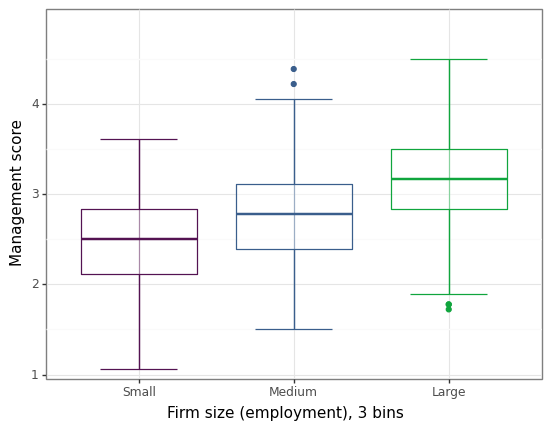

<ggplot: (190634076827)>

In [42]:
# Bot plots
ggplot(df, aes(x="pd.Categorical(df['emp3bins'], categories=sorted(set(df['emp3bins']), reverse=True))",
               y="management",
               ),
    ) + stat_boxplot(
        aes(group="emp3bins"),
        geom="errorbar",
        width=0.5,
        color=(color[1], color[0], color[2]),
        size=0.5,
        na_rm=True,
    ) + geom_boxplot(
        aes(group="emp3bins"),
        color=(color[2], color[0], color[1]),
        size=0.5,
        alpha=0.5,
        na_rm=True,
    ) + labs(
        x="Firm size (employment), 3 bins",
        y="Management score"
    ) + scale_y_continuous(
        expand=(0.01, 0.01), limits=(1, 5), breaks=seq(1, 5, 1)
    ) + theme_bw()

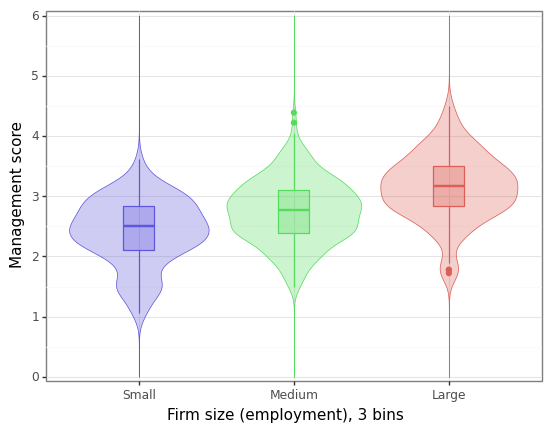

<ggplot: (190634202788)>

In [43]:
ggplot(df, 
       aes(x="pd.Categorical(df['emp3bins'], categories=sorted(set(df['emp3bins']), reverse=True))",
           y="management",
           color="emp3bins",
           fill="emp3bins",    
               ),
    ) + geom_violin(
        aes(group="emp3bins"),
        alpha=0.3,
        size=0.3,
        trim=False,
        show_legend=False,
        na_rm=True,
    ) + geom_boxplot(
        aes(group="emp3bins"),
        size=0.5,
        alpha=0.3,
        width=0.2,
        na_rm=True,
    ) + labs(
        x="Firm size (employment), 3 bins",
        y="Management score"
    ) + scale_y_continuous(
        expand=(0.01, 0.01), limits=(0, 6), breaks=seq(0, 7, 1)
    ) + guides(
        fill=False, color=False
    ) + theme_bw()

We can notice a few things regarding those two plots.
- As the firm size increase, Brazilian firms displayed a **higher median management score**. 
- This positive pattern is noticeable in other statistics. The **min, max, lower, and upper quartiles** also increase as the firm size increase.
- There is a significant difference when considering the spread of the data vs Mexican firms. Small companies in Brazil display a **wider spread of management score**, while that was the oposite case in Mexican firms with a similar size. Overall, Mexican firms displayed higher median values as well.
- The violin plot helps us observe the concentration of the data around certain areas. Here, we can notice how Brazilian small firms display a wider spread of data. This pattern is somewhat noticeable among medium and large-sized firmes too, as the shape of the violin plots is larger around the median yet not too narrow on the end parts.

<h3>4.5 Correlation and latent variable</h3>
<p>A <b>latent variable</b> is an abstract variable, which is not a part of the dataset by itself, as it cannot be directly measured. Instead, we use <b>proxy variables</b>, which indeed replace them as a way to measure its original variables.</p>
<p>

In [44]:
# get the covariance between firm size and management score
covariance = round(df["emp_firm"].cov(df["management"]),2)

In [45]:
df_results = pd.DataFrame(
    data={"covariance": covariance,
     "firm_size_std": df["emp_firm"].std(),
     "management_score_std": df["management"].std(),
     "corr_coef": df["emp_firm"].corr(df["management"])},
     index=[0]
)
df_results

,covariance,firm_size_std,management_score_std,corr_coef
0,206.38,936.190571,0.588271,0.374735


<p>As we can see, the covariance between firm size and the management score is <b>206</b>. The standard deviation for both variables is <b>936.19</b> and <b>0.58</b>, respectively. The correlation coefficient is <b>0.30</b>. This outcome hints at a <b>positive</b> association, whereas firms with more employees tend to have higher management score. Such magnitude, however, is moderate, as other factors may impinge on management score in addition to the size of a company.</p>
<p>Brazilian firms displayed a <b>more positive correlation</b> between firm size and management score than Mexican firms. For the latter, the coefficient was 0.30 and the standard deviation for management score, 0.60.</p>
<p>We can analyze the correlation coefficient in seven broad categories of industrial classification (in addition to one "other" category with the industry with very few firms, combined).

In [46]:
# Correlation by industry
df["industry_broad"] = pd.np.NaN
df.loc[df["sic"] <= 21, "industry_broad"] = "foods_drink_tobacco"
df.loc[
    ((df["sic"] >= 22) & (df["sic"] <= 23)) | (df["sic"] == 31), "industry_broad" 
] = "textile_apparel_leather_etc"
df.loc[(df["sic"] >= 24) & (df["sic"] <= 27), "industry_broad"] = "wood_furniture_paper"
df.loc[(df["sic"] >= 28) & (df["sic"] <= 30), "industry_broad"] = "chemicals_etc"
df.loc[(df["sic"] >= 32) & (df["sic"] < 35), "industry_broad"] = "materials_metals"
df.loc[(df["sic"] >= 35) & (df["sic"] <= 37), "industry_broad"] = "electronics"
df.loc[(df["sic"] == 37) , "industry_broad"] = "auto"
df.loc[(df["sic"] >= 38) , "industry_broad"] = "other"

In [47]:
df["industry_broad"].value_counts()

chemicals_etc                  95
foods_drink_tobacco            76
electronics                    73
textile_apparel_leather_etc    71
wood_furniture_paper           70
materials_metals               65
auto                           44
other                          12
Name: industry_broad, dtype: int64

In [48]:
# Check correlation
df.groupby("industry_broad")["management", "emp_firm"].corr().iloc[0::2, -1]

industry_broad                         
auto                         management    0.278674
chemicals_etc                management    0.302323
electronics                  management    0.547152
foods_drink_tobacco          management    0.332849
materials_metals             management    0.381071
other                        management    0.270929
textile_apparel_leather_etc  management    0.391246
wood_furniture_paper         management    0.527765
Name: emp_firm, dtype: float64

In [49]:
df.filter(["management", "industry_broad"]).loc[
    lambda x: ~x["industry_broad"].isnull()
].groupby("industry_broad").agg(
    Min=("management", min),
    Max=("management", max),
    SD=("management", np.std),
    Median=("management", "median"),
    n=("management", "size")
)

,Min,Max,SD,Median,n
industry_broad,,,,,
auto,1.388889,4.388889,0.558338,3.055556,44
chemicals_etc,1.111111,3.944444,0.511611,2.833333,95
electronics,1.555556,4.277778,0.617068,2.944444,73
foods_drink_tobacco,1.166667,4.222222,0.640897,2.666667,76
materials_metals,1.055556,4.222222,0.557378,2.777778,65
other,1.555556,3.111111,0.440295,2.916667,12
textile_apparel_leather_etc,1.444444,3.555556,0.488979,2.500000,71
wood_furniture_paper,1.166667,4.500000,0.636101,2.527778,70


In [50]:
# Check correlation
cor = (
    pd.DataFrame(
        df.groupby("industry_broad")["management", "emp_firm"].corr().iloc[0::2, -1]
    )
    .reset_index()
    .drop(["level_1"], axis=1)
)

In [51]:
cor.columns = ["industry_broad", "COR"]
cor = cor.set_index("industry_broad")

In [52]:
table = (
    df.filter(["emp_firm", "industry_broad", "management"])
    .groupby("industry_broad")
    .agg(Mean=("management", "mean"), Obs=("management", "size"))
)

table["cor"] = cor["COR"]

In [54]:
table.index = [
    "Auto",
    "Chemicals",
    "Machinery, equipment, electroncis",
    "Food, drinks, tobacco",
    "Materials, metals",
    "Textile, apparel, leather",
    "Wood, furniture, paper",
    "Other",
]
table.round(2)

,Mean,Obs,cor
Auto,2.95,44,0.28
Chemicals,2.88,95,0.30
"Machinery, equipment, electroncis",2.90,73,0.55
"Food, frinks, tobacco",2.63,76,0.33
"Materials, metals",2.71,65,0.38
"Textile, apparel, leather",2.73,12,0.27
"Wood, furniture, paper",2.52,71,0.39
Other,2.59,70,0.53


In [56]:
last_row = (
    table.groupby(lambda _: True)
    .agg(Mean=("Mean", "mean"), Obs=("Obs", "sum"), cor=("cor", "mean"))
    .reset_index(drop=True)
)

last_row.index = ["All"]

In [57]:
table = table.append(last_row)

In [58]:
table = table.loc[:, ["cor", "Mean", "Obs"]].reset_index()
table.columns = [
    "Industry",
    "Management - employment correlation",
    "Management score",
    "Observations",
]

In [59]:
table.round(2)

,Industry,Management - employment correlation,Management score,Observations
0,Auto,0.28,2.95,44
1,Chemicals,0.30,2.88,95
2,"Machinery, equipment, electroncis",0.55,2.90,73
3,"Food, frinks, tobacco",0.33,2.63,76
4,"Materials, metals",0.38,2.71,65
5,"Textile, apparel, leather",0.27,2.73,12
6,"Wood, furniture, paper",0.39,2.52,71
7,Other,0.53,2.59,70
8,All,0.38,2.74,506


As we can observe, the correlation between firm size and management scores varies across industries. `Other` and `Machinery, equipment, electronics` categories displayed significantly higher correlation coefficients. Other industries such as materials, metals and wood, furniture, and paper also performed slightly above the average too. It is also remarkable how the average management score did not differ as much across industriesm with a min average of 2.52 and a max of 2.95. We can conclude that other factors such as firm size may affect how well companies in Brazil perform.

Now, let's compare these results with Mexican firms. First, Brazilian firms overall display a stronger correlation between firm size and management score. While some Mexican industries such as Auto and Textiles displayed significant correlation coefficients (0.50 and 0.63, respectively), others had nearly no correlation, such as Food, Drinks, and Tobacco, and Chemicals (0.05 in both cases). Mean management scores also varied more, ranging from 2.72 and 3.29. When comparing firms from both countries, thus, we can affirm that firm size holds a stronger correlation with management score in Brazil and may affect the quality of management in a higher degree than in Mexico, whose firms get higher mean scores despite firm size, in some cases.

<h2>5. Conclusion</h2>
<p>What did we learn about the association between firm size and management quality? How do these results compare to our findings for Mexico?</p>
<ul>
<li>Among Brazilian manufacturing firms, larger firms tend to be better managed.</li>
<ul>
<li>Large firms have an average score of <b>3.15</b>, compared to <b>2.75</b> for medium-sized firms, and <b>2.41</b> for small ones.</li>
</ul>
<li>The correlation, even though positive, is <b>not very strong</b>. Maybe other issues also affect the quality of management besides firm size.</li>
<li>When disaggregating the results into smaller industry groups, we found that the strength of the management-size correlation differs in some industries from the rest, although we have not observed any pattern that would tell us why.</li>
<li>Management quality is not only better, on average, among larger firms, yet it is also more <b>spread</b> among larger firms.</li>
</ul>
<hr>
<h2><b>Extra</b> | Plotting box plots and violin plots</h2>
<p>The following code plots a descriptive version of a box plot and a violin plot, informing how to read each of them and take into consideration how each of them inform us about the distribution and spread of the data.</p>